In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('/content/goldstock.csv')
data = data.drop('Unnamed: 0',axis=1)
data

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [3]:
data.shape

(2511, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.describe()

,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,298.824811,97600.769382,299.118187,301.262244,296.417703
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [7]:
data.isna().any()

Date      False
Close     False
Volume    False
Open      False
High      False
Low       False
dtype: bool

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0      2024-01-19
1      2024-01-18
2      2024-01-17
3      2024-01-16
4      2024-01-12
          ...    
2506   2014-01-28
2507   2014-01-27
2508   2014-01-24
2509   2014-01-23
2510   2014-01-22
Name: Date, Length: 2511, dtype: datetime64[ns]

In [9]:
data.corr()

,Date,Close,Volume,Open,High,Low
Date,1.000000,0.890902,0.100190,0.890809,0.889666,0.892313
Close,0.890902,1.000000,0.022835,0.998994,0.999524,0.999576
Volume,0.100190,0.022835,1.000000,0.027012,0.030871,0.018274
Open,0.890809,0.998994,0.027012,1.000000,0.999459,0.999386
High,0.889666,0.999524,0.030871,0.999459,1.000000,0.999251
Low,0.892313,0.999576,0.018274,0.999386,0.999251,1.000000


<Axes: >

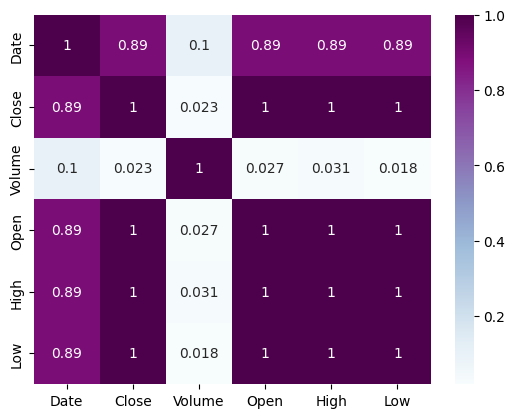

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='BuPu')

In [17]:
data.corr()['Close'].sort_values(ascending=False)

Close     1.000000
Low       0.999576
High      0.999524
Open      0.998994
Date      0.890902
Volume    0.022835
Name: Close, dtype: float64

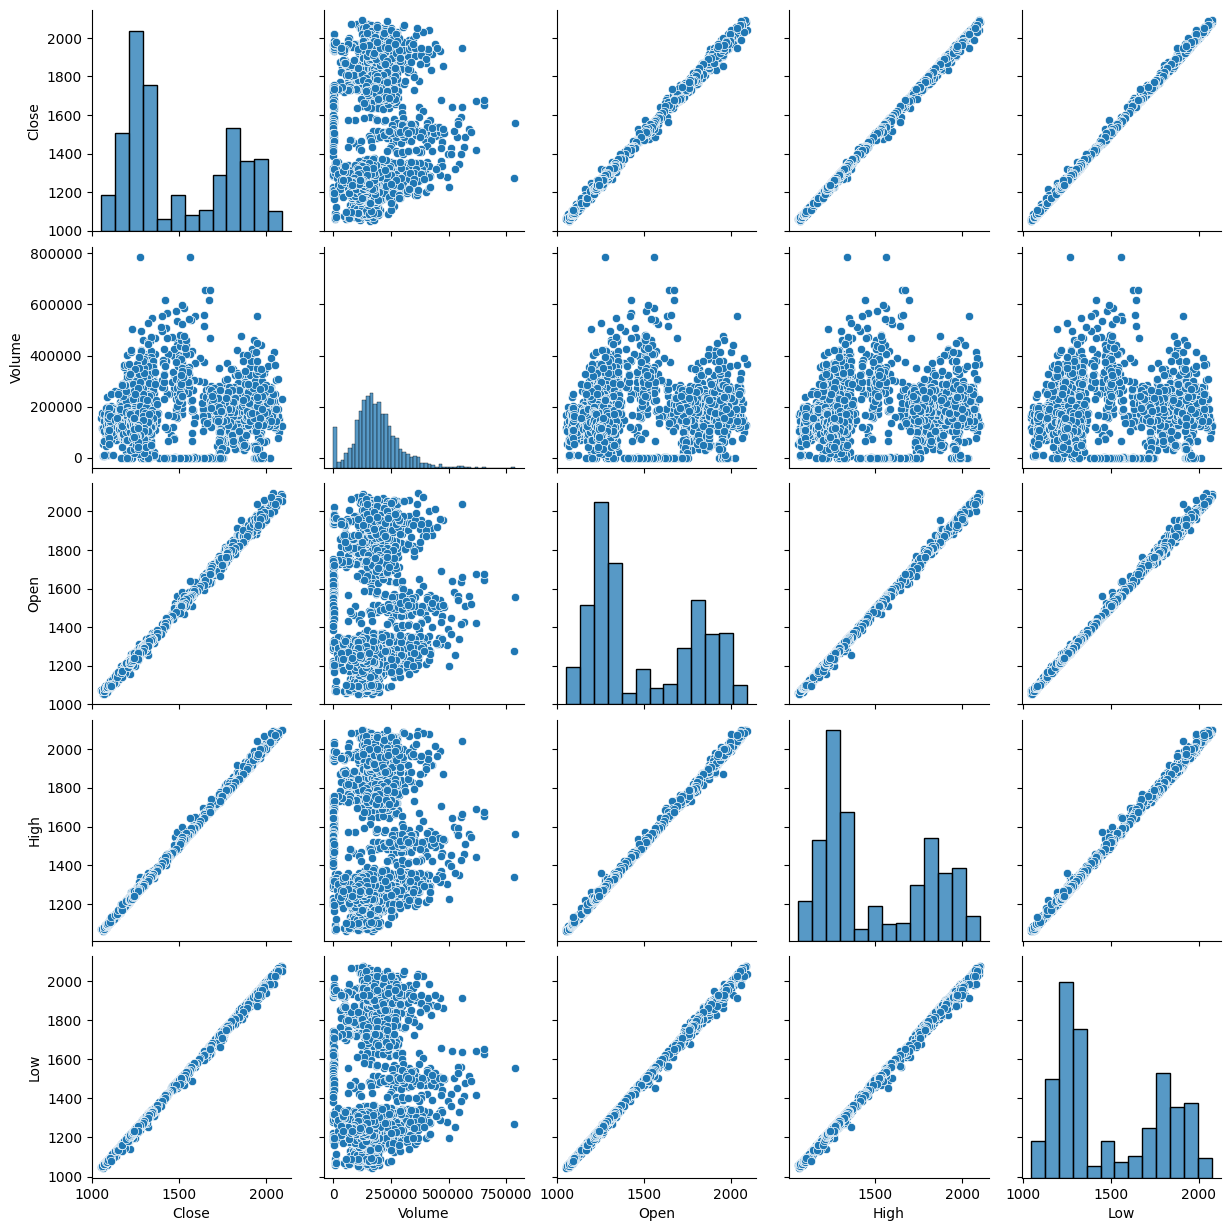

In [19]:
sns.pairplot(data)

<ipython-input-23-9030ca6f08fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'],color='green')


<Axes: xlabel='Close', ylabel='Density'>

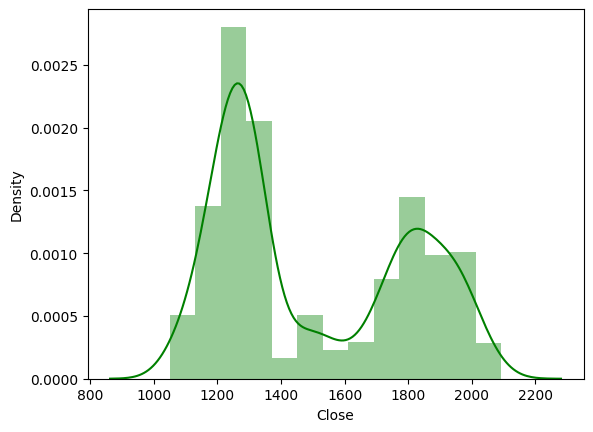

In [23]:
sns.distplot(data['Close'],color='green')

<ipython-input-29-92ca6dc0e49f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color='red')


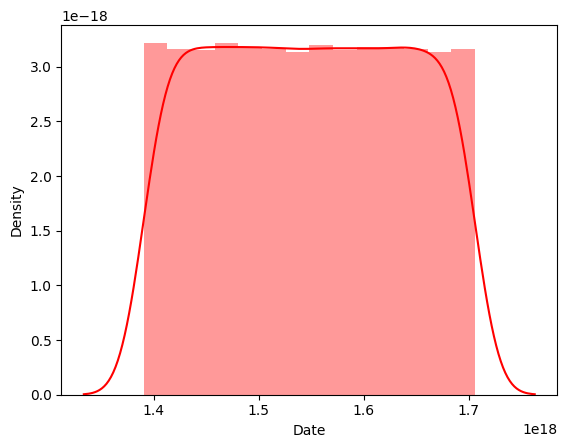

<ipython-input-29-92ca6dc0e49f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color='red')


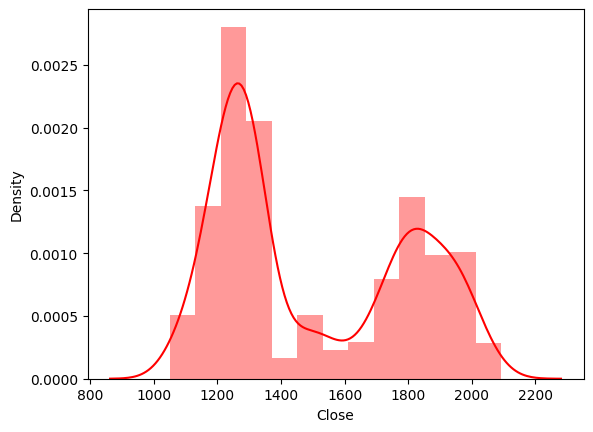

<ipython-input-29-92ca6dc0e49f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color='red')


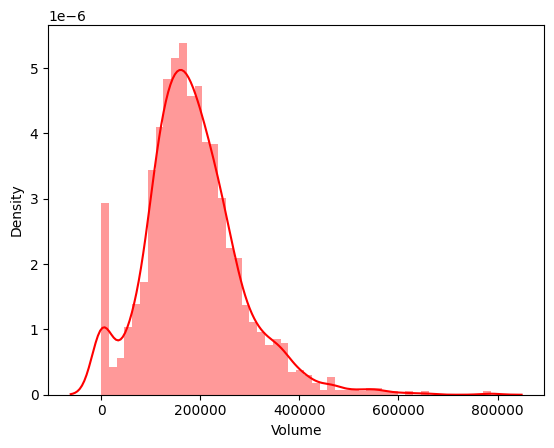

<ipython-input-29-92ca6dc0e49f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color='red')


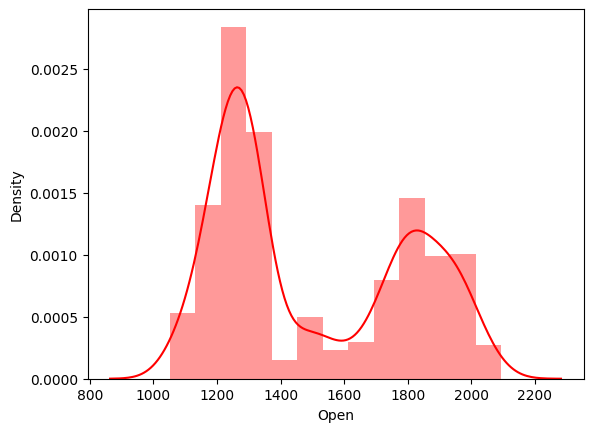

<ipython-input-29-92ca6dc0e49f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color='red')


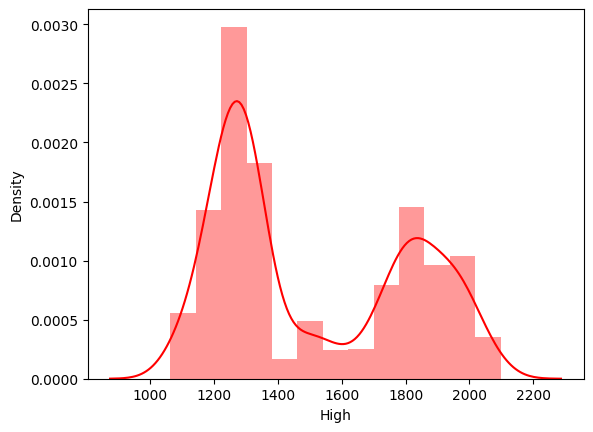

<ipython-input-29-92ca6dc0e49f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color='red')


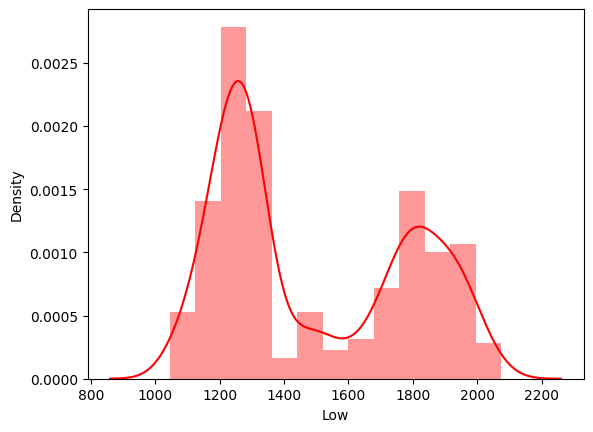

In [29]:
for i in data:
  sns.distplot(data[i],color='red')
  plt.show()


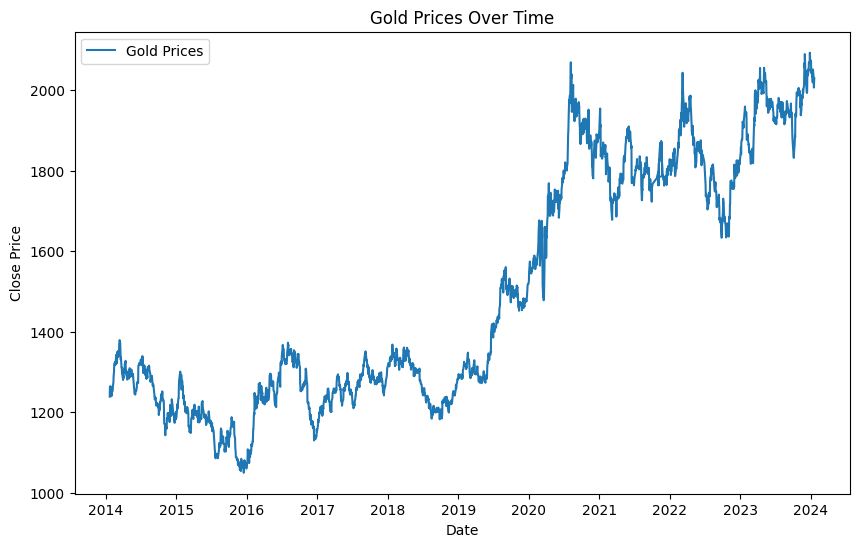

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Gold Prices')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Date'].astype(str),  # Convert to string
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(xaxis_rangeslider_visible=True, title='Candlestick Chart of Daily Prices')
fig.show()

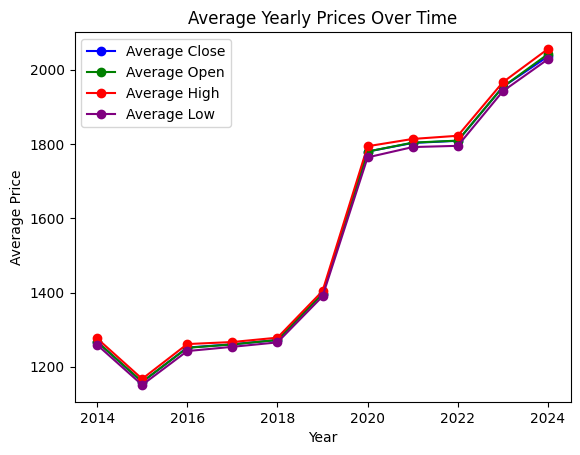

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

# Now, you can use the resample method
data_yearly = data.resample('Y').mean()

# Plotting code
plt.plot(data_yearly.index.year, data_yearly['Close'], label='Average Close', marker='o', color='blue')
plt.plot(data_yearly.index.year, data_yearly['Open'], label='Average Open', marker='o', color='green')
plt.plot(data_yearly.index.year, data_yearly['High'], label='Average High', marker='o', color='red')
plt.plot(data_yearly.index.year, data_yearly['Low'], label='Average Low', marker='o', color='purple')

# Plot settings
plt.title('Average Yearly Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()

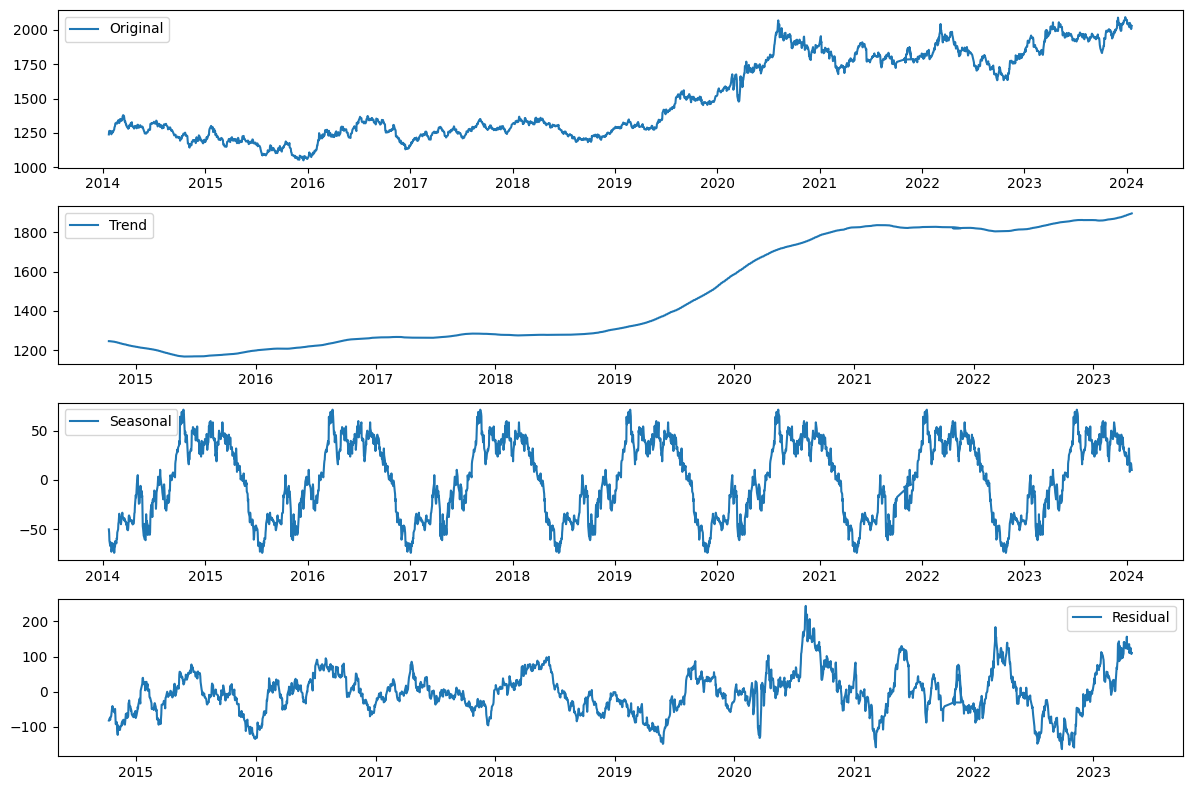

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Close'], model='additive', period=365)  # Assuming daily data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
for i in range(1, 11):
    data[f'lag_{i}'] = data['Close'].shift(i)

In [ ]:
data = data.dropna()

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
X_train, y_train = train.drop('Close', axis=1), train['Close']
X_test, y_test = test.drop('Close', axis=1), test['Close']

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:
predictions

array([1103.152 , 1091.8566, 1089.7391, 1091.8566, 1099.1405, 1099.1405,
       1099.4031, 1099.1405, 1092.2349, 1090.3827, 1103.8959, 1103.152 ,
       1103.152 , 1103.6047, 1103.8959, 1103.6047, 1103.6047, 1103.152 ,
       1093.8889, 1092.541 , 1089.9895, 1092.0963, 1092.2743, 1089.7391,
       1092.0931, 1089.9895, 1093.8889, 1092.0963, 1099.2654, 1091.8566,
       1093.8889, 1093.8889, 1092.0963, 1098.92  , 1103.152 , 1103.6047,
       1103.6047, 1089.7391, 1091.8566, 1089.7391, 1098.9323, 1089.7391,
       1093.4225, 1099.7711, 1092.1427, 1089.9895, 1089.9895, 1099.1405,
       1093.4225, 1089.7391, 1099.6135, 1106.0277, 1135.2854, 1141.2231,
       1168.3384, 1156.6243, 1168.3439, 1179.4158, 1167.031 , 1180.9167,
       1180.9167, 1167.7281, 1178.6041, 1182.2156, 1183.0128, 1166.0859,
       1164.8113, 1153.6233, 1153.4879, 1140.6099, 1142.4514, 1132.5972,
       1125.2915, 1127.082 , 1123.8749, 1115.3994, 1124.6957, 1138.0007,
       1147.4854, 1130.1729, 1130.0063, 1109.5405, 

In [ ]:
model.score(X_test,y_test)

0.9819367181776513

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 7.2361075212855575


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 7.2361075212855575
MSE: 110.68620186017313
RMSE: 10.520751012174612


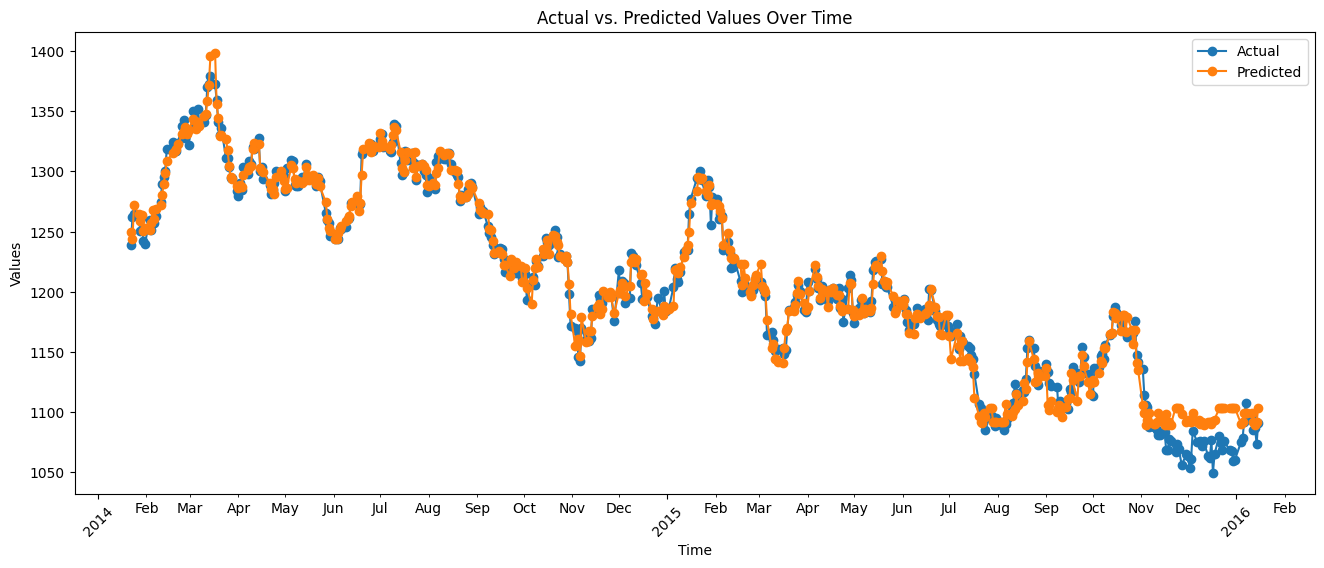

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(16, 6))

plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, predictions, label='Predicted', marker='o')

plt.legend()
plt.title('Actual vs. Predicted Values Over Time')
plt.xlabel('Time')
plt.ylabel('Values')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

plt.xticks(rotation=45)
plt.show()

<ipython-input-33-f1eb8ff22220>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-f1eb8ff22220>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-f1eb8ff22220>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-f1eb8f

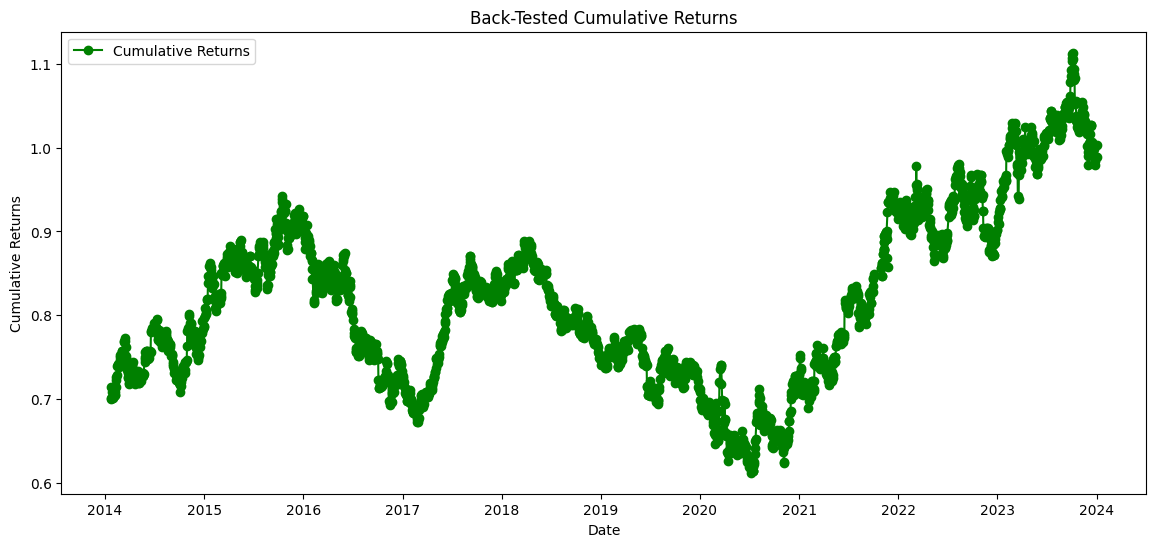

Total Return: -28.56%
Annualized Return: -3.33%
Annualized Volatility: 14.82%
Sharpe Ratio: -0.22


In [ ]:
# Back-Tested Cumulative Returns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the datetime index and 'Close' prices
# Let's create hypothetical moving averages for illustration
data['Short_MA'] = data['Close'].rolling(window=20).mean()
data['Long_MA'] = data['Close'].rolling(window=50).mean()

# Define a back-testing strategy: Buy when short-term MA crosses above long-term MA, sell vice versa
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, -1)

# Calculate daily returns based on the trading signals
data['Daily_Return'] = data['Close'].pct_change() * data['Signal'].shift(1)

# Cumulative returns
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

# Visualize cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Cumulative_Return'], label='Cumulative Returns', marker='o', color='green')
plt.title('Back-Tested Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Calculate performance metrics
total_return = data['Cumulative_Return'].iloc[-1] - 1
annualized_return = (1 + total_return) ** (252 / len(data)) - 1  # Assuming 252 trading days in a year
annualized_volatility = data['Daily_Return'].std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

In [ ]:
# Statistical Analyses
# Calculate basic descriptive statistics
mean_price = data['Close'].mean()
std_deviation = data['Close'].std()
median_price = data['Close'].median()
min_price = data['Close'].min()
max_price = data['Close'].max()

print(f"Mean: {mean_price}")
print(f"Standard Deviation: {std_deviation}")
print(f"Median: {median_price}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Mean: 1496.6008396641346
Standard Deviation: 297.5201065260879
Median: 1332.2
Minimum Price: 1049.6
Maximum Price: 2093.1


<ipython-input-35-1eafc5526368>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-1eafc5526368>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



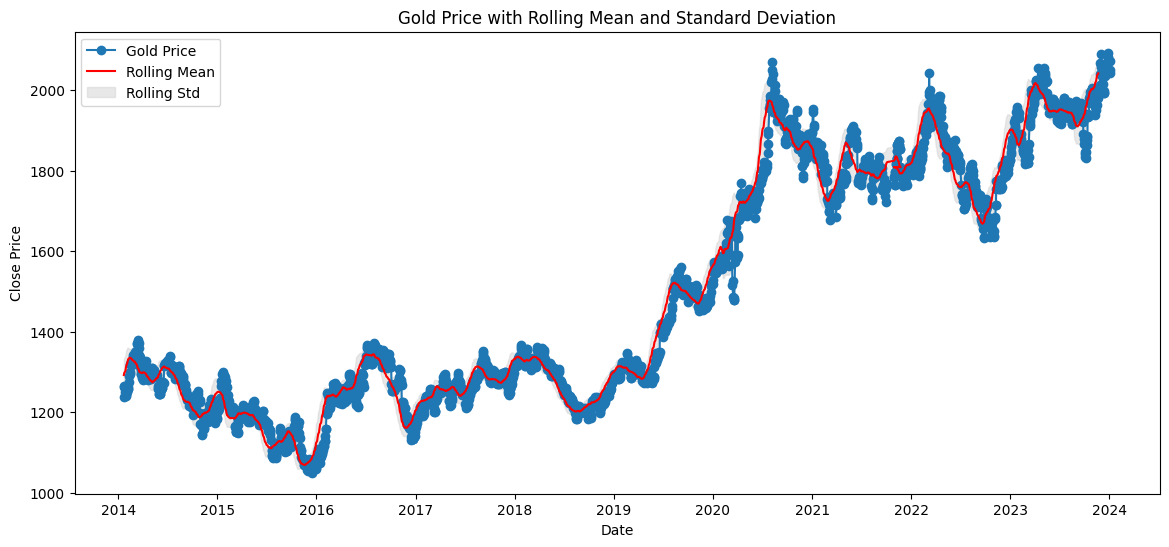

In [ ]:
# Calculate rolling mean and standard deviation
data['Rolling_Mean'] = data['Close'].rolling(window=30).mean()
data['Rolling_Std'] = data['Close'].rolling(window=30).std()

# Visualize the results
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Gold Price', marker='o')
plt.plot(data.index, data['Rolling_Mean'], label='Rolling Mean', color='red')
plt.fill_between(data.index, data['Rolling_Mean'] - data['Rolling_Std'], data['Rolling_Mean'] + data['Rolling_Std'],
                 color='lightgray', alpha=0.5, label='Rolling Std')
plt.title('Gold Price with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

<ipython-input-36-66cdf4264f25>:13: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



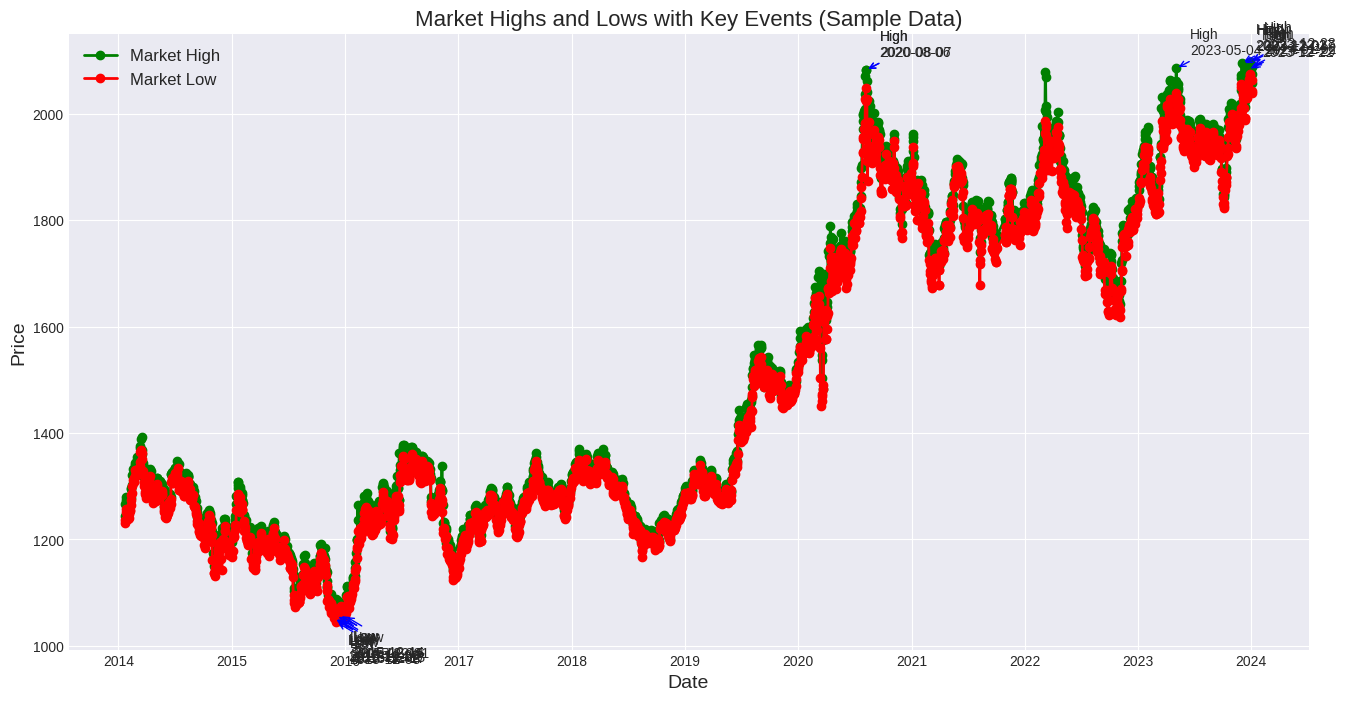

In [ ]:
### Key EVents
import pandas as pd
import matplotlib.pyplot as plt

# Extract top 10 highest and lowest values
top_10_high = data.nlargest(10, 'High')
top_10_low = data.nsmallest(10, 'Low')

# Combine the extracted data to create a sample dataset
sample_data = pd.concat([top_10_high, top_10_low])

# Set up the plot style
plt.style.use('seaborn-darkgrid')

# Visualize market highs and lows with a bar plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(data.index, data['High'], label='Market High', marker='o', color='green', linewidth=2)
ax.plot(data.index, data['Low'], label='Market Low', marker='o', color='red', linewidth=2)

# Add annotations for top 10 highest and lowest values
for date, label in zip(top_10_high.index, top_10_high.index.strftime('%Y-%m-%d')):
    ax.annotate(f'High\n{label}', xy=(date, data.loc[date, 'High']), xytext=(10, 10),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))

for date, label in zip(top_10_low.index, top_10_low.index.strftime('%Y-%m-%d')):
    ax.annotate(f'Low\n{label}', xy=(date, data.loc[date, 'Low']), xytext=(10, -30),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))

# Set plot aesthetics
ax.set_title('Market Highs and Lows with Key Events (Sample Data)', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.legend(fontsize=12)

plt.show()

<ipython-input-37-a872e2a2c747>:12: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



Other dates with High values:

Other dates with Low values:



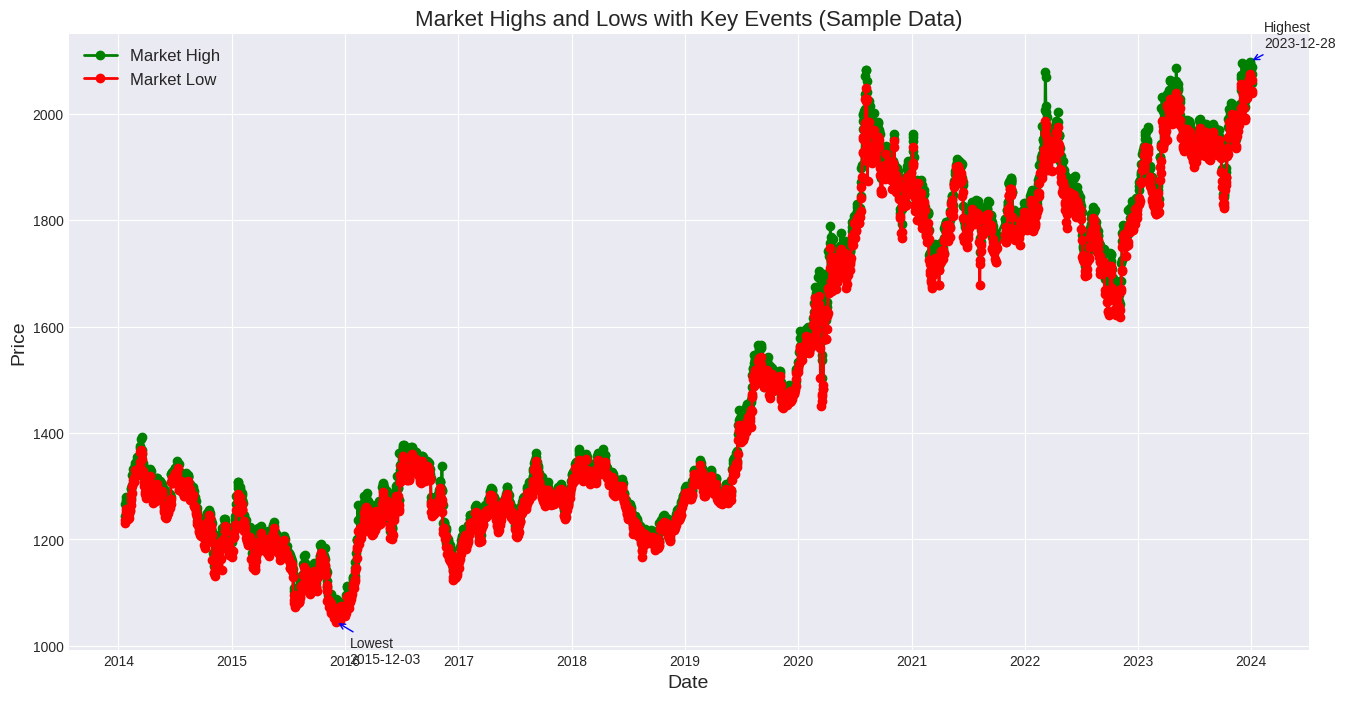

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract top 1 highest and lowest values
top_1_high = data.nlargest(1, 'High')
top_1_low = data.nsmallest(1, 'Low')

# Combine the extracted data to create a sample dataset
sample_data = pd.concat([top_1_high, top_1_low])

# Set up the plot style
plt.style.use('seaborn-darkgrid')

# Visualize market highs and lows with a bar plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(data.index, data['High'], label='Market High', marker='o', color='green', linewidth=2)
ax.plot(data.index, data['Low'], label='Market Low', marker='o', color='red', linewidth=2)

# Add annotations for top 1 highest and lowest values directly on the graph
ax.annotate(f'Highest\n{top_1_high.index[0].strftime("%Y-%m-%d")}', xy=(top_1_high.index[0], top_1_high['High'].values[0]),
            xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))

ax.annotate(f'Lowest\n{top_1_low.index[0].strftime("%Y-%m-%d")}', xy=(top_1_low.index[0], top_1_low['Low'].values[0]),
            xytext=(10, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))

# Set plot aesthetics
ax.set_title('Market Highs and Lows with Key Events (Sample Data)', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.legend(fontsize=12)

# Print other dates in the notebook
print(f"Other dates with High values:\n{', '.join(top_1_high.index.strftime('%Y-%m-%d').tolist()[1:])}")
print(f"Other dates with Low values:\n{', '.join(top_1_low.index.strftime('%Y-%m-%d').tolist()[1:])}")

plt.show()